In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test) =keras.datasets.mnist.load_data()
x_train=x_train/255
x_test=x_test/255
print(len(x_train))
print(len(x_test))
x_train[0]

60000
10000


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

0


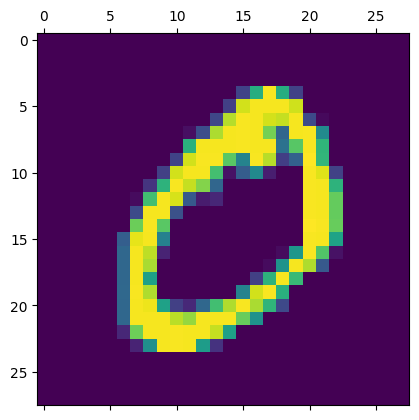

In [3]:
plt.matshow(x_train[1])
print(y_train[1])


In [4]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [5]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [6]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 449us/step - loss: 0.4745 - accuracy: 0.8744
Epoch 2/10
1875/1875 [==============================] - 1s 388us/step - loss: 0.3050 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 1s 405us/step - loss: 0.2842 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 1s 398us/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 1s 432us/step - loss: 0.2670 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 1s 417us/step - loss: 0.2628 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 1s 425us/step - loss: 0.2582 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 1s 398us/step - loss: 0.2552 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 1s 400us/step - loss: 0.2533 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 1s 419u

In [11]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 403us/step - loss: 0.2644 - accuracy: 0.9275


[0.2644016444683075, 0.9275000095367432]

313/313 [==============================] - 0s 290us/step
[4.1375093e-02 7.1941199e-06 1.3516371e-01 1.8755927e-03 9.9219459e-01
 7.9669086e-03 1.6449371e-01 1.5182056e-01 1.8795702e-01 6.9538969e-01]
4


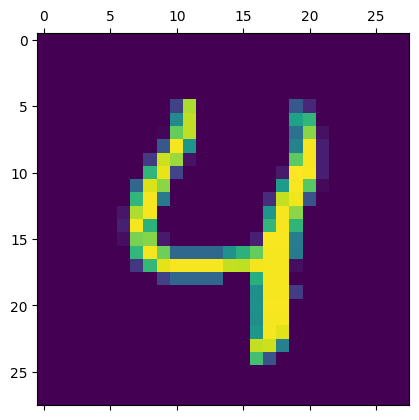

In [12]:
plt.matshow(x_test[4])
y_predicted=model.predict(x_test_flattened)
print(y_predicted[4])
print(np.argmax(y_predicted[4]))

In [13]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:10])
print(y_test[:10])



[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7 2 1 0 4 1 4 9 5 9]


In [15]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1108,    5,    2,    0,    1,    4,    2,   13,    0],
       [   7,    5,  941,   14,    7,    2,   11,    8,   34,    3],
       [   3,    0,   23,  927,    2,   13,    2,    9,   24,    7],
       [   1,    1,    5,    2,  912,    0,    7,    4,   10,   40],
       [  10,    2,    4,   44,   10,  765,   11,    8,   31,    7],
       [  12,    3,    7,    1,    7,   13,  912,    1,    2,    0],
       [   1,    6,   24,    8,    9,    1,    0,  937,    2,   40],
       [   8,    7,    8,   21,    9,   18,   10,    7,  874,   12],
       [  11,    7,    1,   10,   22,    4,    0,   11,    7,  936]],
      dtype=int32)>

Text(33.22222222222222, 0.5, 'Truth')

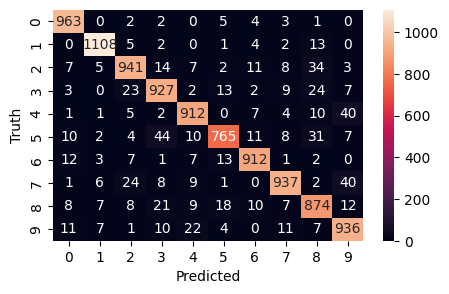

In [19]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')